In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### The goal of this project is to forecast the power consumption of the Eastern United States Region Service by PJM

"PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia."

Source: Wikipedia (https://en.wikipedia.org/wiki/PJM_Interconnection)
Note: The dataset was not gotten from wikipedia. The only information gotten from wikipedia is the explanatio of PJM and the areas they service.

In [2]:
# Store the power consumption dataset inside a pandas dataframe
df = pd.read_csv('PJME_hourly.csv')

# View the first few rows of the data
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
# Check the last few rows
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [4]:
# Check for null data
df.isna().sum()

Datetime    0
PJME_MW     0
dtype: int64

#### The output above shows that there is not missing data.

#### Let's get some further understanding of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [7]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


#### We have a total of 145366 rows of data

<Axes: >

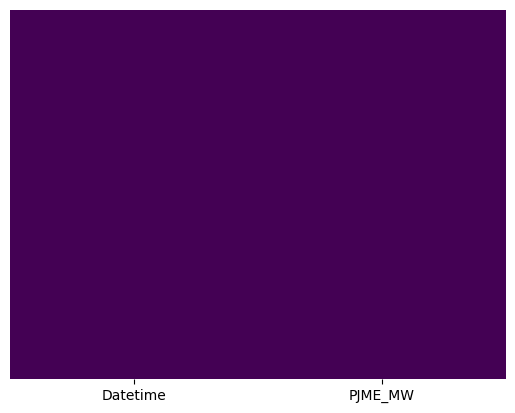

In [5]:
# Let check for missing data using some seaborn visualization

sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap= 'viridis')

#### The heat map also confirms that there is no missing data. If there was any missing data, we will see yellow dashes in its respective column.

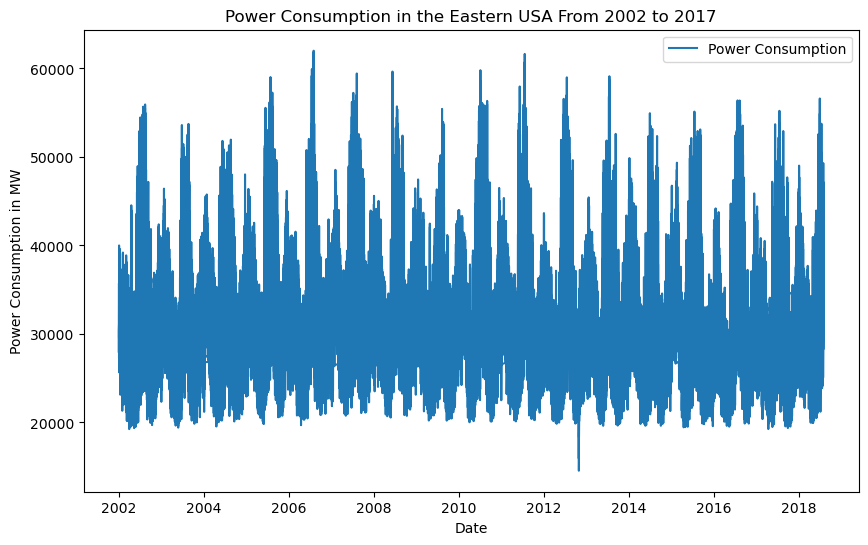

In [20]:
# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Let's plot a graph that will show us the energy usage

fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
ax.plot(df['Datetime'], df['PJME_MW'], label='Power Consumption')
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption in MW')
ax.legend()
ax.set_title('Power Consumption in the Eastern USA From 2002 to 2017')

plt.show()

<Axes: >

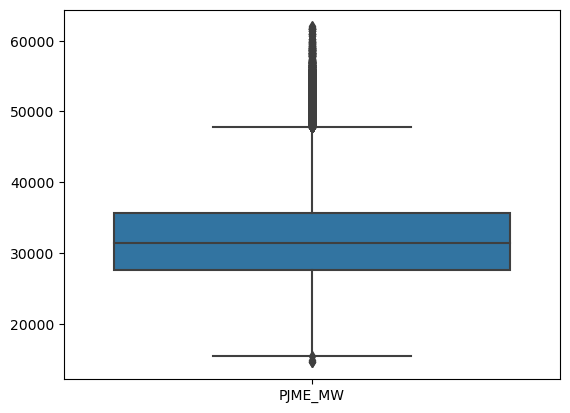

In [21]:
sns.boxplot(data=df)

#### It looks like we have some spikes in the data. Let's break things down a bot further to see if we can decode them.

In [24]:
# Let's start by creating new features

df['weekday_name'] = df['Datetime'].dt.day_name()
df['weekday'] = df['Datetime'].dt.weekday
df['month'] = df['Datetime'].dt.month
df['hour'] = df['Datetime'].dt.hour
df['year'] = df['Datetime'].dt.year

df.head()

,Datetime,PJME_MW,weekday,month,hour,year,weekday_name
0,2002-12-31 01:00:00,26498.0,1,12,1,2002,Tuesday
1,2002-12-31 02:00:00,25147.0,1,12,2,2002,Tuesday
2,2002-12-31 03:00:00,24574.0,1,12,3,2002,Tuesday
3,2002-12-31 04:00:00,24393.0,1,12,4,2002,Tuesday
4,2002-12-31 05:00:00,24860.0,1,12,5,2002,Tuesday


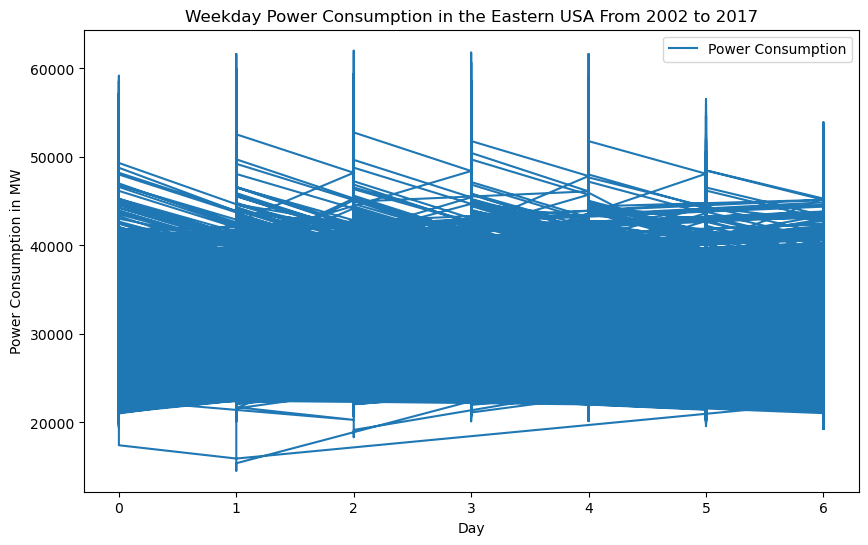

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
ax.plot(df['weekday'], df['PJME_MW'], label='Power Consumption')
ax.set_xlabel('Day')
ax.set_ylabel('Power Consumption in MW')
ax.legend()
ax.set_title('Weekday Power Consumption in the Eastern USA From 2002 to 2017')

plt.show()

#### That plot is not very useful. Let's try a box plot

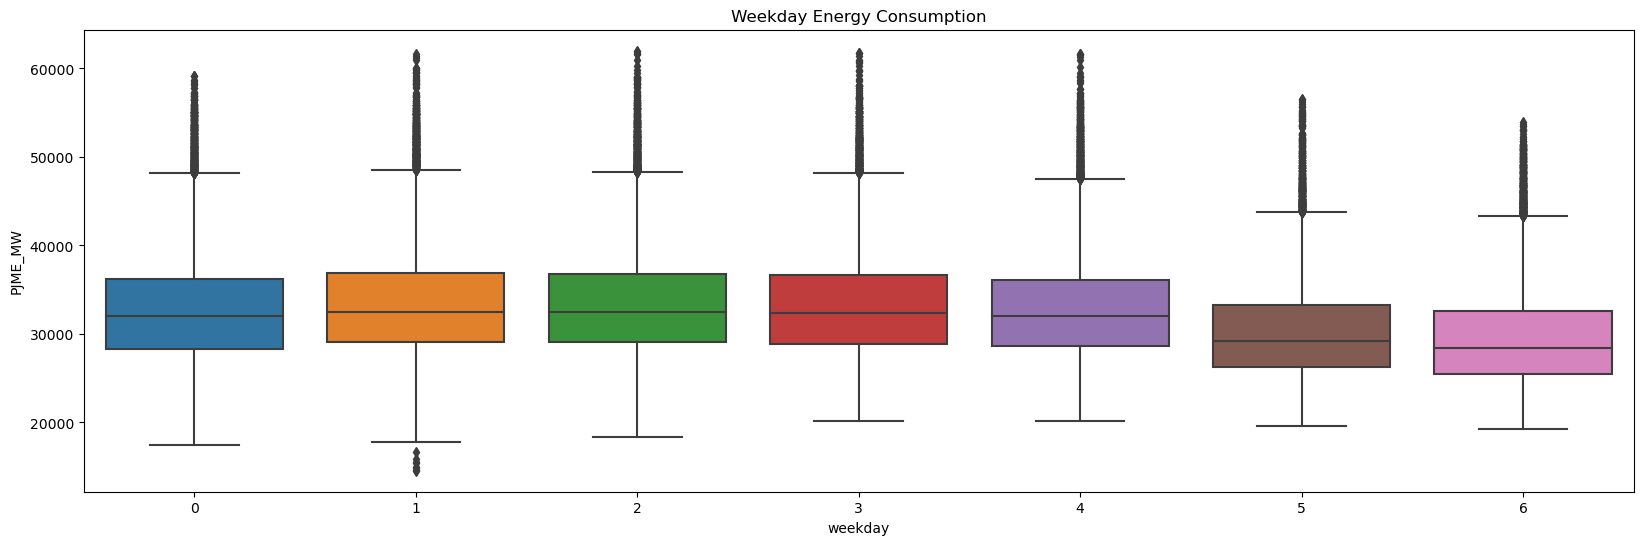

In [31]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df, x='weekday', y='PJME_MW')
ax.set_title('Weekday Energy Consumption')
plt.show()

#### We can see that Monday through Friday (0 - 4) have a similar power consumption, but the weekends, Saturday and Sunday (5 and 6), have a lower power consumption.

#### Let's see if we can get more insight using the hourly data.

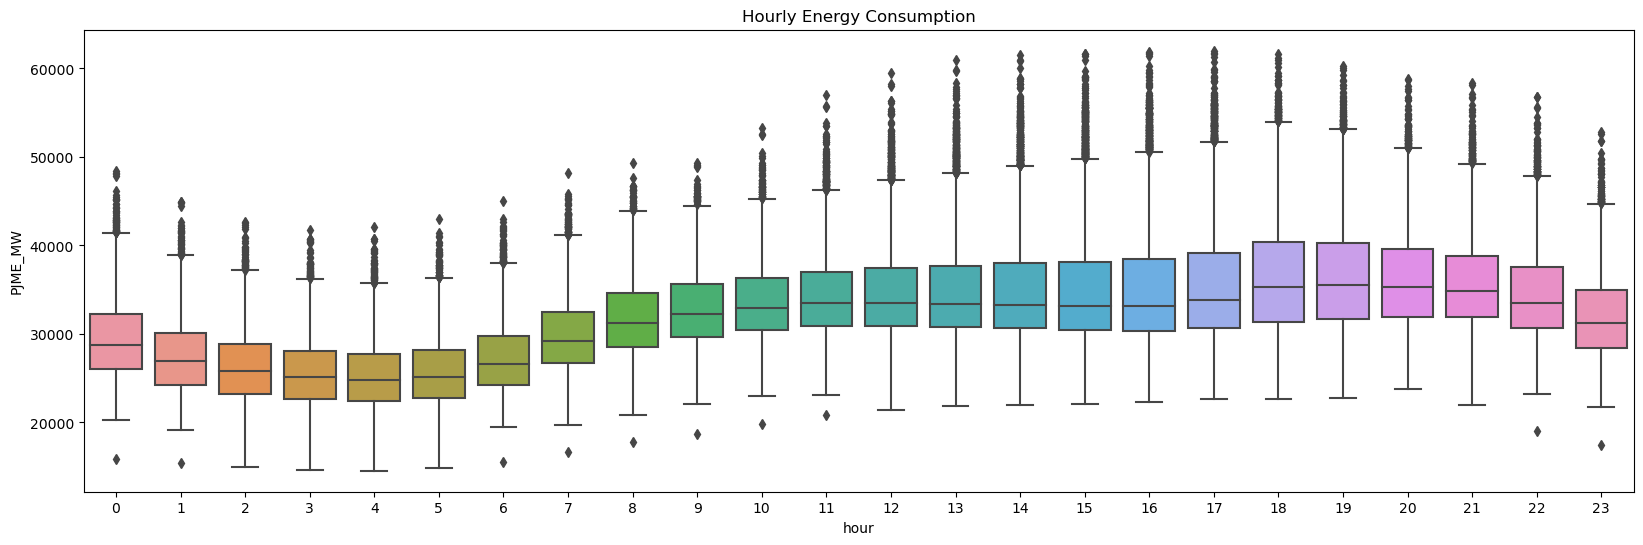

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('Hourly Energy Consumption')
plt.show()

#### Let's do the same thing for month

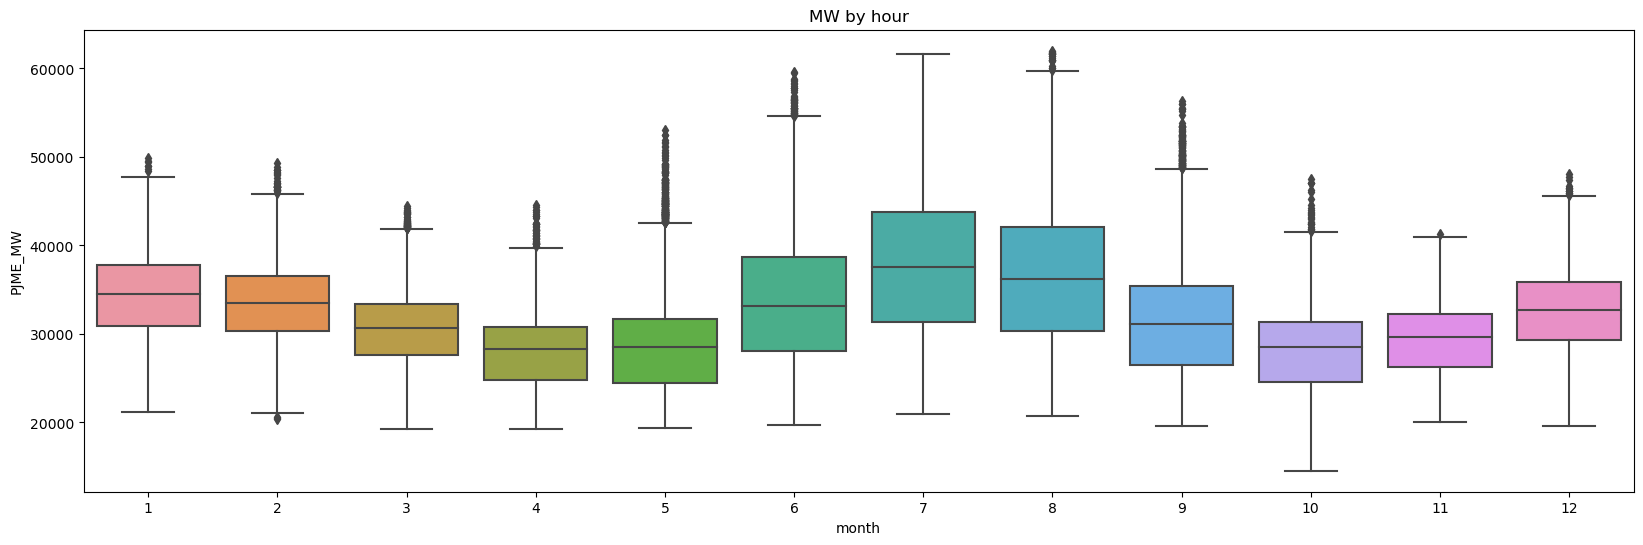

In [32]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('MW by hour')
plt.show()

#### It looks like the most power is used during the summer months

C:\Users\oguon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


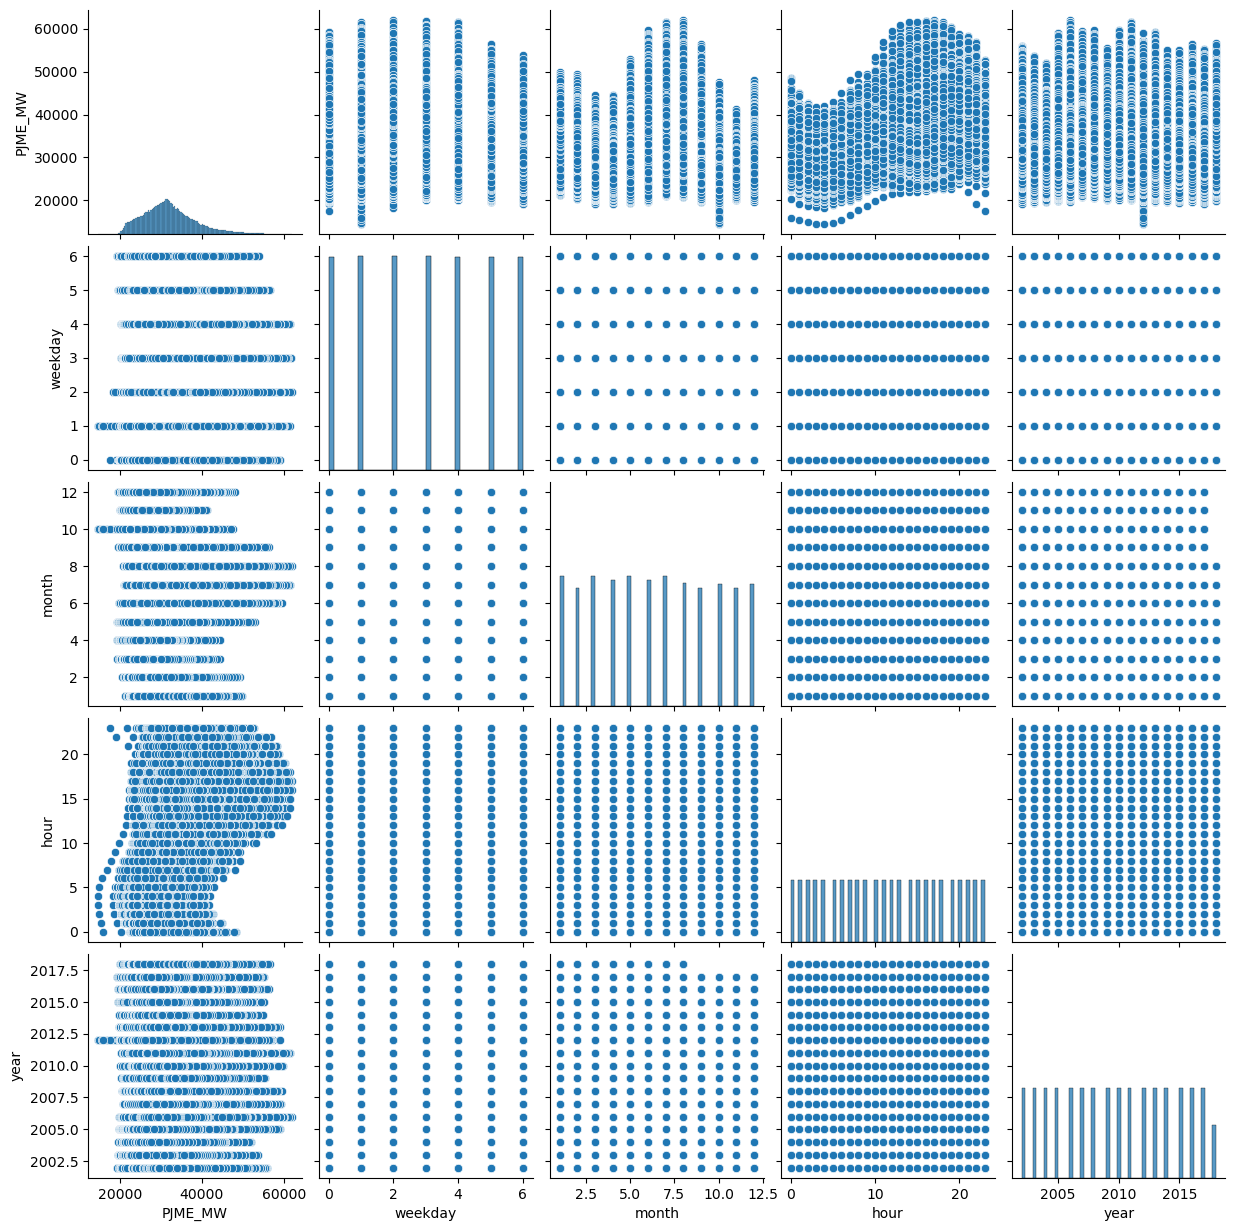

In [33]:
# Let's see the pairplot of our new datframe to further understand any underlying relationships.

sns.pairplot(data=df)

In [36]:
#Let's check the correlation
df.drop('weekday_name', axis=1).corr()

,Datetime,PJME_MW,weekday,month,hour,year
Datetime,1.000000,-0.061119,-0.000043,0.016501,0.000030,0.998195
PJME_MW,-0.061119,1.000000,-0.183058,-0.044522,0.486303,-0.058505
weekday,-0.000043,-0.183058,1.000000,-0.000086,0.000317,-0.000035
month,0.016501,-0.044522,-0.000086,1.000000,-0.000049,-0.043370
hour,0.000030,0.486303,0.000317,-0.000049,1.000000,-0.000131
year,0.998195,-0.058505,-0.000035,-0.043370,-0.000131,1.000000


#### We are going to split the data into training and testing. We are not going to use sklearn to randamly split the data because we re trying to foecast. So, what we are going to do is split the data into old and new. the ols data will be the training data and it will be used to predict the test data ( the newer data).

In [40]:
df.head()

,Datetime,PJME_MW,weekday,month,hour,year,weekday_name
0,2002-12-31 01:00:00,26498.0,1,12,1,2002,Tuesday
1,2002-12-31 02:00:00,25147.0,1,12,2,2002,Tuesday
2,2002-12-31 03:00:00,24574.0,1,12,3,2002,Tuesday
3,2002-12-31 04:00:00,24393.0,1,12,4,2002,Tuesday
4,2002-12-31 05:00:00,24860.0,1,12,5,2002,Tuesday


In [41]:
df_train = df.loc[df['Datetime'] < '2015-01-01']
df_test = df.loc[df['Datetime'] >= '2015-01-01']

Features = ['hour', 'weekday', 'month', 'year']
Target = 'PJME_MW'

X_train = df_train[Features]
y_train = df_train[Target]

X_test = df_test[Features]
y_test = df_test[Target]

#### We are going to use XGBoost for this. What is XGBoost?

XGBoost (eXtreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting for supervised learning tasks, widely used in Python for both classification and regression problems. It is based on an ensemble of decision trees, where each new tree corrects the errors made by the previous ones. XGBoost uses advanced regularization (L1 and L2) to reduce overfitting and features a highly optimized algorithm that makes it both fast and scalable, suitable for large datasets. Its xgboost Python library offers easy integration with other machine learning libraries like scikit-learn, and supports functionalities like missing value handling, parallel processing, and model tuning via hyperparameters. Because of its strong predictive performance, XGBoost is popular in data science competitions and real-world applications.

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [42]:
model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate=0.001)
model.fit(X_train, y_train,
        eval_set=[(X_train,  y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6447.90261	validation_1-rmse:6517.66825
[100]	validation_0-rmse:6039.87483	validation_1-rmse:6138.67407
[200]	validation_0-rmse:5683.99083	validation_1-rmse:5813.49175
[300]	validation_0-rmse:5373.27680	validation_1-rmse:5536.31896
[400]	validation_0-rmse:5102.92731	validation_1-rmse:5298.38328
[500]	validation_0-rmse:4865.99304	validation_1-rmse:5091.16693
[600]	validation_0-rmse:4653.94910	validation_1-rmse:4906.11466
[700]	validation_0-rmse:4468.87578	validation_1-rmse:4746.92703
[800]	validation_0-rmse:4309.35484	validation_1-rmse:4612.08390
[900]	validation_0-rmse:4172.32354	validation_1-rmse:4498.56067
[999]	validation_0-rmse:4055.23478	validation_1-rmse:4404.76010


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
# Let us make predictions with our model
df_test['prediction'] = model.predict(X_test)

# Let us determine how good the model is
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

C:\Users\oguon\AppData\Local\Temp\ipykernel_19544\3129501838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prediction'] = model.predict(X_test)


RMSE on the training data: 4055.2347767240353

RMSE on the test data: 4404.760098597076


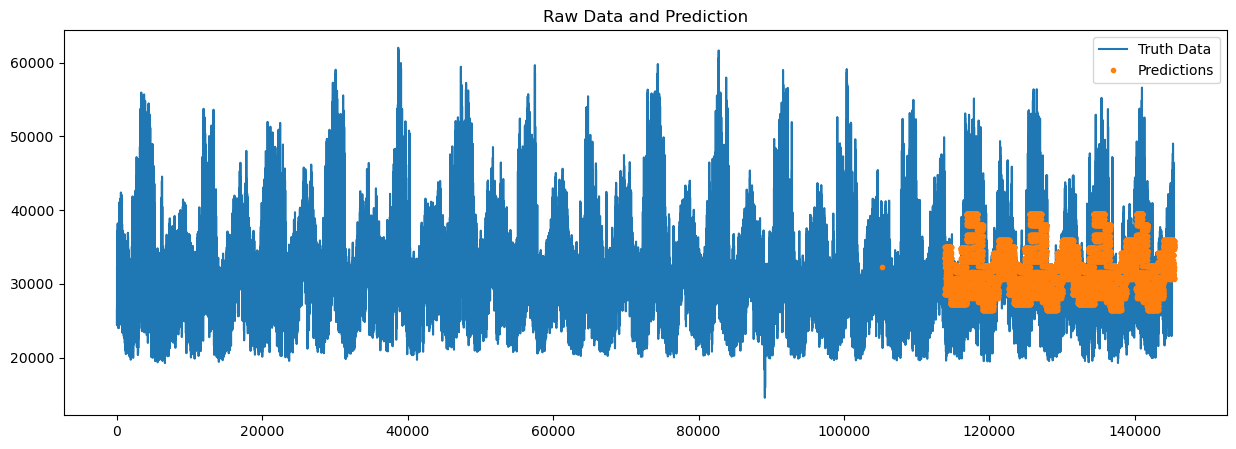

In [50]:
# Let's us superimpose our predictions on the real data
df = df.merge(df_test['prediction'], how='left', left_index=True, right_index=True)

ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

#### Considereing the fact that the root mean square on the training data and testing data are close. The model performed well, we may be able to make it better by a further preprocessing of more feature extraction.